In [91]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import numpy as np

In [113]:
# Path to your NetCDF file
# nc_file_avg = "../Data/2D2sim-AMD_averages.nc"
casename = "2D2sim-20"
nc_file_avg = f"../Data/{casename}_averages.nc"

print(nc_file_avg)
ds_avg = xr.open_dataset(nc_file_avg).load()
ds_avg.close()
print(ds_avg)
print("\n=======\n")

# nc_file = "../Log/buoyancy_and_wind.nc"
# ds = xr.open_dataset(nc_file).load()
# ds.close()
# print(ds)

../Data/2D2sim-20_averages.nc
<xarray.Dataset> Size: 10MB
Dimensions:  (zC: 128, zF: 129, xC: 1024, yF: 1, xF: 1024, yC: 1, time: 1921)
Coordinates:
  * zC       (zC) float64 1kB -99.29 -97.88 -96.49 ... -0.9796 -0.5853 -0.1945
  * zF       (zF) float64 1kB -100.0 -98.58 -97.18 -95.8 ... -0.7815 -0.389 0.0
  * xC       (xC) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
  * yF       (yF) float64 8B 1.0
  * xF       (xF) float64 8kB 0.0 1.0 2.0 3.0 ... 1.021e+03 1.022e+03 1.023e+03
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 15kB 00:00:00 00:15:00 ... 20 days 00:00:00
Data variables:
    v        (time, zC, yF) float64 2MB -2.691e-06 -3.25e-06 ... 0.005399
    w        (time, zF, yC) float64 2MB 0.0 1.059e-22 ... -4.235e-20 0.0
    b        (time, zC, yC) float64 2MB -0.008936 -0.00881 ... -0.003789
    u        (time, zC) float64 2MB -1.081e-05 3.711e-06 ... 0.02586 0.02651
    N2       (time, zF) float64 2MB 9e-05 9e-05 9e-05 ... -1.17e-05 -0.00

In [200]:
ds_avg.b.sel(time="00:00:00")

<xarray.DataArray 'b' (zC: 128, yC: 1)> Size: 1kB
array([[-8.93627670e-03],
       [-8.80952280e-03],
       [-8.68414633e-03],
       [-8.56013140e-03],
       [-8.43746228e-03],
       [-8.31612344e-03],
       [-8.19609952e-03],
       [-8.07737534e-03],
       [-7.95993591e-03],
       [-7.84376637e-03],
       [-7.72885208e-03],
       [-7.61517853e-03],
       [-7.50273140e-03],
       [-7.39149651e-03],
       [-7.28145988e-03],
       [-7.17260765e-03],
       [-7.06492615e-03],
       [-6.95840185e-03],
       [-6.85302139e-03],
       [-6.74877154e-03],
...
       [-7.44426831e-04],
       [-7.02866129e-04],
       [-6.61696898e-04],
       [-6.20914591e-04],
       [-5.80514712e-04],
       [-5.40492817e-04],
       [-5.00844513e-04],
       [-4.61565459e-04],
       [-4.22651363e-04],
       [-3.84097983e-04],
       [-3.45901127e-04],
       [-3.08056650e-04],
       [-2.70560455e-04],
       [-2.33408495e-04],
       [-1.96596767e-04],
       [-1.60121315e-04],
       [-1.23978229e-04],
       [-8.81636436e-05],
       [-5.26737400e-05],
       [-1.75047419e-05]])
Coordinates:
  * zC       (zC) float64 1kB -99.29 -97.88 -96.49 ... -0.9796 -0.5853 -0.1945
  * yC       (yC) float64 8B 1.0
    time     timedelta64[ns] 8B 00:00:00
Attributes:
    units:      m/s²
    long_name:  Buoyancy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


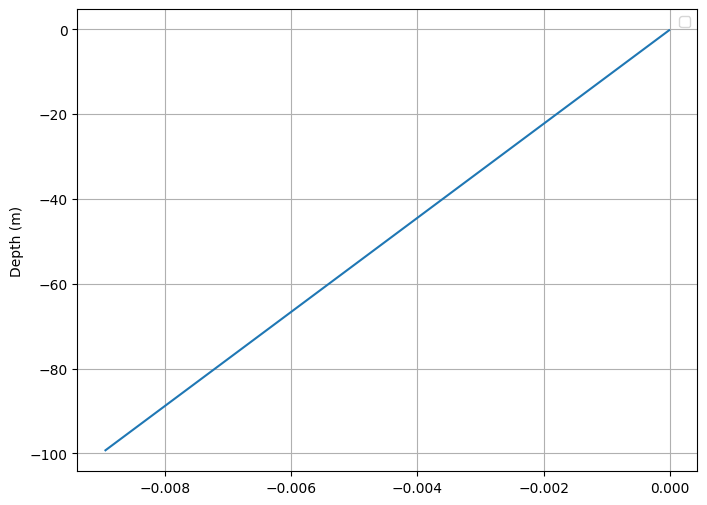

In [201]:


plt.figure(figsize=(8, 6))
plt.plot(ds_avg.b.sel(time="00:00:00"), ds_avg.zC)
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

# $$\text{Figure 2}$$

In [31]:
casename = "20"
casename1 = f"2D1sim-{casename}-working-n"
casename2 = f"2D2sim-{casename}"
nc_file_avg1 = f"../Data/{casename1}_averages.nc"
nc_file_avg2 = f"../Data/{casename2}_averages.nc"

ds_avg1 = xr.open_dataset(nc_file_avg1).load()
ds_avg2 = xr.open_dataset(nc_file_avg2).load()
ds_avg1.close()
ds_avg2.close()


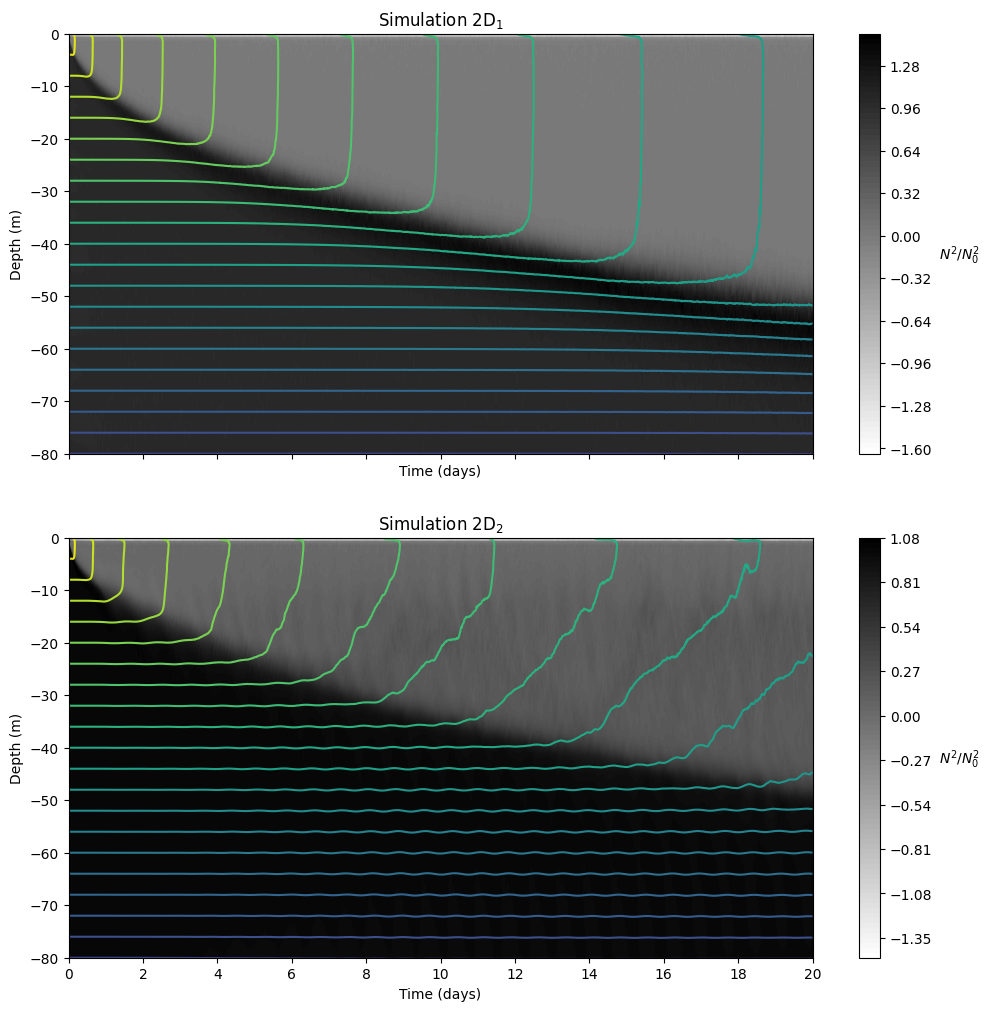

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12), sharex=True)

N02 = 9e-5

# Plot for ds_avg1
ax1 = axes[0]

N2_1 = ds_avg1['N2']
time_1 = N2_1.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_1 = N2_1.coords['zF'].values
N2_values_1 = N2_1.values / N02

contourf_1 = ax1.contourf(time_1, depth_1, N2_values_1.T, levels=100, cmap='gray_r')
cbar_1 = plt.colorbar(contourf_1, ax=ax1)
cbar_1.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_1 = ax1.contour(time_1, ds_avg1.b.zC, ds_avg1.b[:, :, 0].T / N02, levels=25, cmap='viridis')

ax1.set_title(r'Simulation 2D$_1$')
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Depth (m)')
ax1.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_1.min())
time_max = np.ceil(time_1.max())
ax1.set_xticks(np.arange(time_min, time_max + 2, 2))

# Plot for ds_avg2
ax2 = axes[1]
N2_2 = ds_avg2['N2']
time_2 = N2_2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth_2 = N2_2.coords['zF'].values
N2_values_2 = N2_2.values / N02

contourf_2 = ax2.contourf(time_2, depth_2, N2_values_2.T, levels=100, cmap='gray_r')
cbar_2 = plt.colorbar(contourf_2, ax=ax2)
cbar_2.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

contour_2 = ax2.contour(ds_avg2.b.time / np.timedelta64(1, 'D'), ds_avg2.b.zC, ds_avg2.b[:, :, 0].T / N02, levels=25, cmap='viridis')

ax2.set_title(r'Simulation 2D$_2$')
ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time_2.min())
time_max = np.ceil(time_2.max())
ax2.set_xticks(np.arange(time_min, time_max + 2, 2))

# ax1.set_xticks(ticks)
# ax2.set_xticks(ticks)

# Save the figure
plt.savefig(f"{casename}-fig-2.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the filled contours for N^2 / N_0^2
N2 = ds_avg['N2']
N02 = 9e-5

time = N2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth = N2.coords['zF'].values
N2_values = N2.values / N02

contourf = ax.contourf(time, depth, N2_values.T, levels=100, cmap='gray_r')
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

# Overlay the contour lines of the x-averaged buoyancy
contour = ax.contour(ds_avg.b.time/np.timedelta64(1, 'D'), ds_avg.b.zC, ds_avg.b[:, :, 0].T / N02, levels=25, cmap='viridis')

# Customize labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(-80, 0)

# Save the figure
plt.savefig(f"{casename}-combined-fig.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (129, 1)

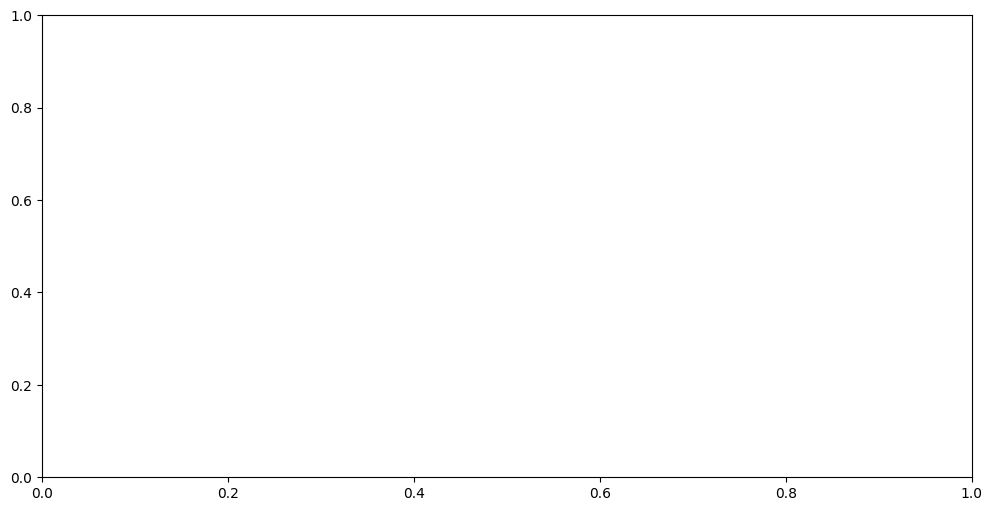

In [257]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the filled contours for N^2 / N_0^2
N2 = ds_avg['N2']
N02 = 9e-5

time = N2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth = N2.coords['zF'].values
N2_values = N2.values / N02

contourf = ax.contourf(time, depth, N2_values.T, levels=100, cmap='gray_r')
cbar = plt.colorbar(contourf, ax=ax)
cbar.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

# Overlay the contour lines of the x-averaged buoyancy
contour = ax.contour(ds_avg.b.time/np.timedelta64(1, 'D'), ds_avg.b.zC, ds_avg.b[:, :, 0].T / N02, levels=25, cmap='viridis')

# Customize labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time.min())
time_max = np.ceil(time.max())
ax.set_xticks(np.arange(time_min, time_max + 2, 2))

# Save the figure
plt.savefig(f"{casename}-combined-fig.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

-1.631697744950066
1.5174365468999695


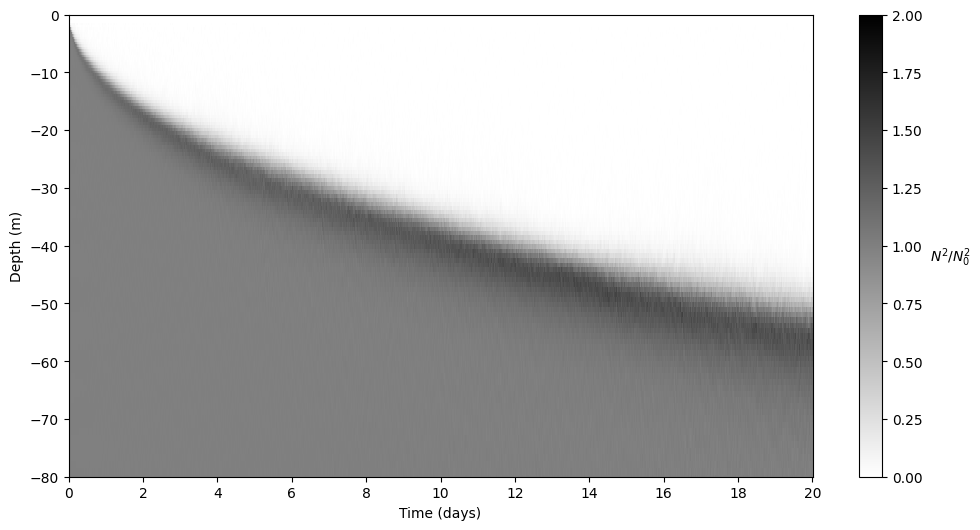

In [112]:
N2 = ds_avg['N2']
N02 = 9e-5

time = N2.coords['time'].values / np.timedelta64(1, 'D')  # Convert time to days
depth = N2.coords['zF'].values
N2_values = N2.values / N02

# print(N2.values)
print(N2_values.min())
print(N2_values.max())

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
contour = ax.pcolormesh(time, depth, N2_values.T, vmin=0, vmax=2, cmap='gray_r')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label(r'$N^2 / N_0^2$', rotation=0, labelpad=20)

ax.set_xlabel('Time (days)')
ax.set_ylabel('Depth (m)')
ax.set_ylim(-80, 0)

# Set x-axis ticks to increments of 2 days
time_min = np.floor(time.min())
time_max = np.ceil(time.max())
ax.set_xticks(np.arange(time_min, time_max + 2, 2))

plt.savefig(f"{casename}-fig2-1.png", dpi=300, bbox_inches='tight')

plt.show()

In [109]:
b = ds_avg.b

In [110]:
b

<xarray.DataArray 'b' (time: 307, zC: 128, yC: 1)> Size: 314kB
array([[[-8.93627670e-03],
        [-8.80952280e-03],
        [-8.68414633e-03],
        ...,
        [-8.81636436e-05],
        [-5.26737400e-05],
        [-1.75047419e-05]],

       [[-8.88895743e-03],
        [-8.80085088e-03],
        [-8.68295599e-03],
        ...,
        [-1.21086374e-04],
        [-1.05444645e-04],
        [-9.73982773e-05]],

       [[-8.85387860e-03],
        [-8.78458173e-03],
        [-8.67809671e-03],
        ...,
...
        ...,
        [-1.68129528e-03],
        [-1.68034958e-03],
        [-1.67988307e-03]],

       [[-7.31684615e-03],
        [-7.31073805e-03],
        [-7.29874207e-03],
        ...,
        [-1.68405336e-03],
        [-1.68310922e-03],
        [-1.68264347e-03]],

       [[-7.31409200e-03],
        [-7.30799393e-03],
        [-7.29601756e-03],
        ...,
        [-1.68680693e-03],
        [-1.68586434e-03],
        [-1.68539936e-03]]])
Coordinates:
  * zC       (zC) float64 1kB -99.29 -97.88 -96.49 ... -0.9796 -0.5853 -0.1945
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 2kB 00:00:00 00:15:00 ... 3 days 04:30:00
Attributes:
    units:      m/s²
    long_name:  Buoyancy

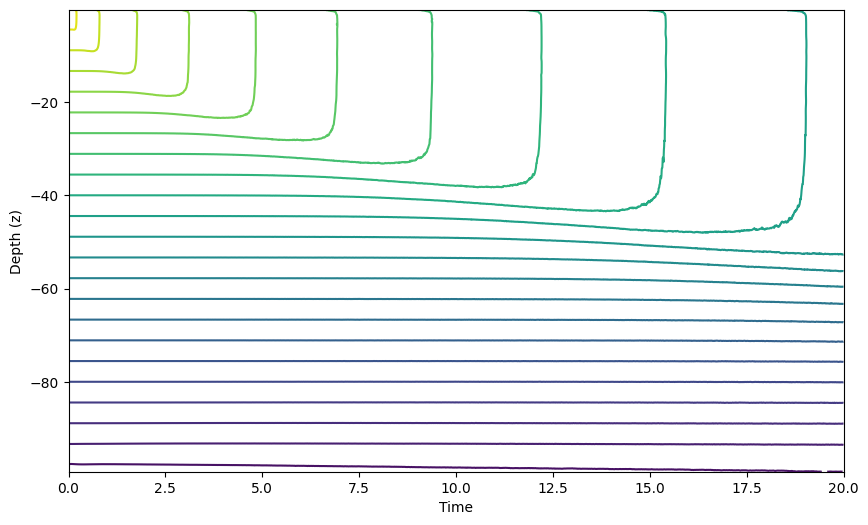

In [231]:
# contour lines of the x-averaged buoyancy 
plt.figure(figsize=(10, 6))
contour = plt.contour(ds_avg.b.time/np.timedelta64(1, 'D'), ds_avg.b.zC, ds_avg.b[:, :, 0].T, levels=25, cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Depth (z)')

plt.savefig(f"{casename}fig2-2.png", dpi=300, bbox_inches='tight')


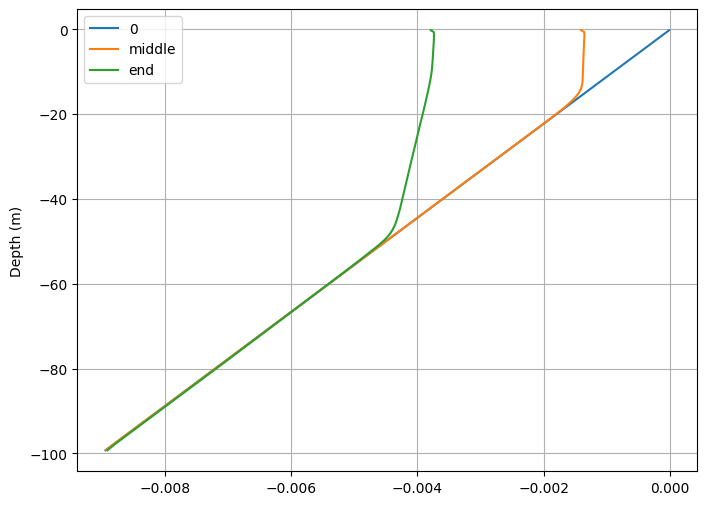

In [100]:
b = ds_avg.b

plt.figure(figsize=(8, 6))
plt.plot(b.isel(time=0).values, ds_avg.zC, label="0")
plt.plot(b.isel(time=230).values, ds_avg.zC, label="middle")
plt.plot(b.isel(time=-1).values, ds_avg.zC, label="end")
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

In [99]:
# Define the jump size
jump_size = 500

# Extract the time values from the dataset
time_values = ds_avg.time.values

# Generate the indices to plot, starting from 0 up to the last index, with the specified jump size
time_indices = range(0, len(time_values), jump_size)

plt.figure(figsize=(8, 6))

# Loop through the time indices
for time_index in time_indices:
    time_label = str(time_values[time_index])  # Convert time value to string for labeling
    plt.plot(b.isel(time=time_index).values, ds_avg.zC)


plt.plot(b.isel(time=-1).values, ds_avg.zC)

plt.ylabel('Depth (m)')

plt.title(r'Simulation 2D$_2$')
plt.grid()
plt.show()


NameError: name 'b' is not defined

<Figure size 800x600 with 0 Axes>

# $$\langle N^2 \rangle$$ 

In [45]:
def load_and_extract_data(dataset_path, day_limit, variable_name):
    ds = xr.open_dataset(dataset_path)
    ds_selected = ds.sel(time=slice(None, f'{day_limit} days'))
    selected_data = ds_selected[variable_name]
    return selected_data

In [87]:
def plot_data(data_list, labels, x_coord='zF', y_label='Value'):
    plt.figure(figsize=(10, 6))
    
    for data, label in zip(data_list, labels):        
        plt.plot(data.mean(dim='time').values, data.zF, label=label)
    
    
    
    plt.legend()
    plt.grid(True)
    plt.show()

[<xarray.DataArray 'N2' (time: 1536, zF: 129)> Size: 2MB
[198144 values with dtype=float64]
Coordinates:
  * zF       (zF) float64 1kB -100.0 -98.58 -97.18 -95.8 ... -0.7815 -0.389 0.0
  * time     (time) timedelta64[ns] 12kB 00:00:00 00:15:00 ... 15 days 23:45:00]


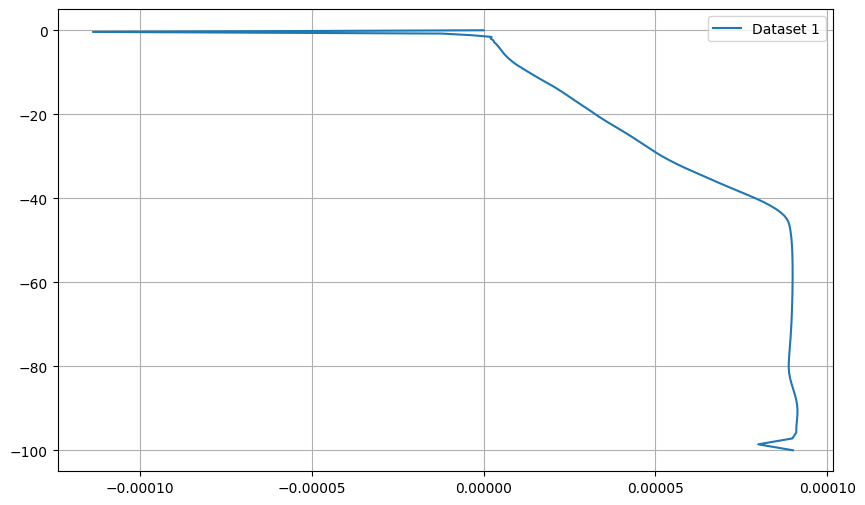

In [88]:
datasets = ['../Data/2D2sim-20_averages.nc']  

day_limit = 15
variable_name = 'N2'
labels = ['Dataset 1']  # Corresponding labels for the datasets

data_list = [load_and_extract_data(ds, day_limit, variable_name) for ds in datasets]

print(data_list)
plot_data(data_list, labels, y_label=f'{variable_name} Value')

In [84]:
# Path to your NetCDF file
case = "20"
casename = f"2D1sim-{case}-working-n"
nc_file_avg = f"../Data/{casename}_averages.nc"
ds_avg = xr.open_dataset(nc_file_avg).load()
ds_avg.close()
ds_buoyancy_day15 = ds_avg.sel(time=slice(None, '15 days'))

In [85]:
print(ds_buoyancy_day15)

<xarray.Dataset> Size: 8MB
Dimensions:  (zC: 128, zF: 129, xC: 1024, yF: 1, xF: 1024, yC: 1, time: 1536)
Coordinates:
  * zC       (zC) float64 1kB -99.29 -97.88 -96.49 ... -0.9796 -0.5853 -0.1945
  * zF       (zF) float64 1kB -100.0 -98.58 -97.18 -95.8 ... -0.7815 -0.389 0.0
  * xC       (xC) float64 8kB 0.5 1.5 2.5 3.5 ... 1.022e+03 1.022e+03 1.024e+03
  * yF       (yF) float64 8B 1.0
  * xF       (xF) float64 8kB 0.0 1.0 2.0 3.0 ... 1.021e+03 1.022e+03 1.023e+03
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 12kB 00:00:00 00:15:00 ... 15 days 23:45:00
Data variables:
    v        (time, zC, yF) float64 2MB -2.691e-06 -3.25e-06 ... -0.000464
    w        (time, zF, yC) float64 2MB 0.0 1.059e-22 ... -1.355e-19 0.0
    b        (time, zC, yC) float64 2MB -0.008936 -0.00881 ... -0.003728
    u        (time, zC) float64 2MB -1.081e-05 3.711e-06 ... 0.007324 0.007309
    N2       (time, zF) float64 2MB 9e-05 9e-05 9e-05 ... -0.0001256 0.0
Attributes:
    interval:   

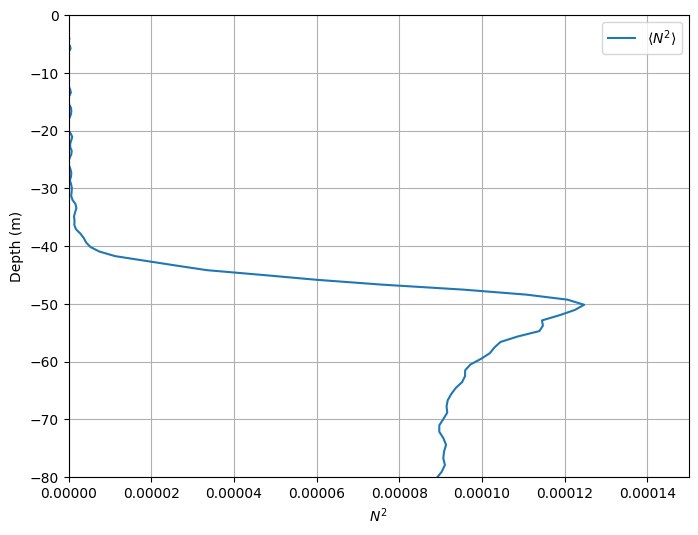

In [111]:
# Path to your NetCDF file
nc_file_avg = f"../Data/{casename}_averages.nc"
ds_avg = xr.open_dataset(nc_file_avg).load()
ds_avg.close()
ds_buoyancy_day15 = ds_avg.sel(time=slice(None, '15 days'))

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(ds_buoyancy_day15.N2.isel(time=-1).values, ds_buoyancy_day15.zF, label="$\langle N^2 \\rangle$")
ax.set_ylabel('Depth (m)')
ax.set_xlabel('$N^2$')
ax.legend()
ax.grid()

ax.set_ylim(-80, 0)
ax.set_xlim(0,15e-5)

plt.savefig(f"{casename}-N2.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

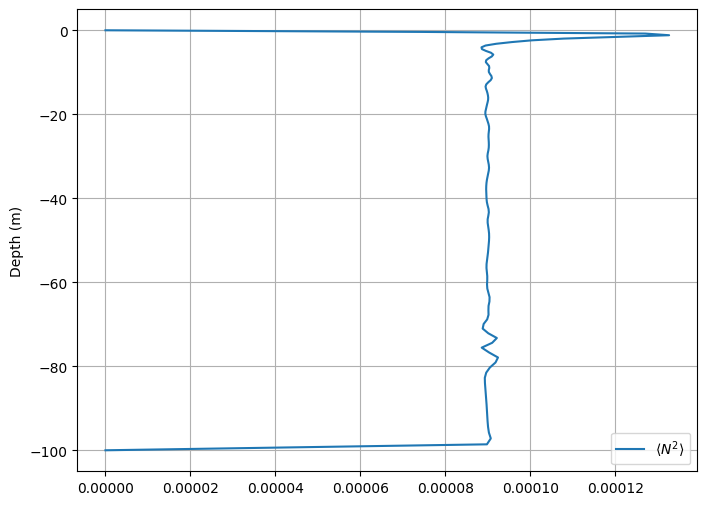

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(ds_avg.N2.sel(time='18:45:00').values, ds_avg.zF, label="$\langle N^2 \\rangle$")
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()


<>:11: SyntaxWarning: invalid escape sequence '\l'
<>:11: SyntaxWarning: invalid escape sequence '\l'
C:\Users\admin\AppData\Local\Temp\ipykernel_33712\4018019166.py:11: SyntaxWarning: invalid escape sequence '\l'
  ax.plot(ds_avg.N2.isel(time=frame), ds_avg.zF, label="$\langle N^2 \\rangle$")


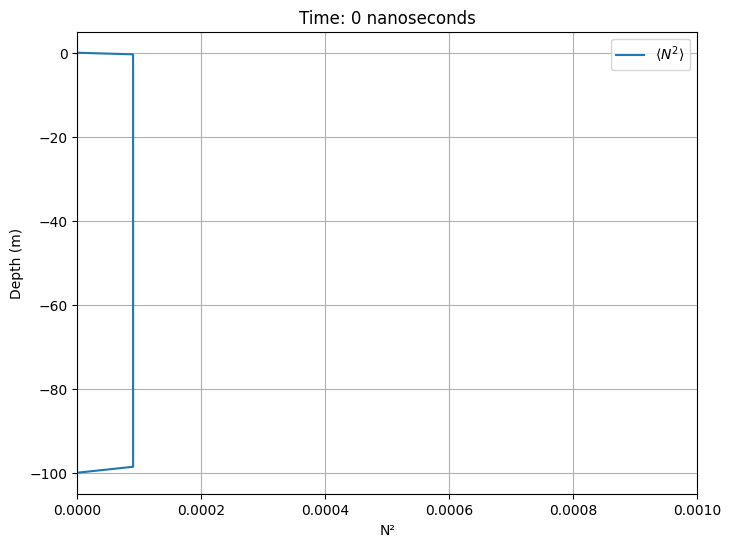

: 

In [33]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the overall min and max of N2 for all time frames to set x-axis limits
N2_min = 0#ds_avg.N2.min().values
N2_max = 0.001#ds_avg.N2.max().values

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    ax.plot(ds_avg.N2.isel(time=frame), ds_avg.zF, label="$\langle N^2 \\rangle$")
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('N²')
    ax.legend()
    ax.grid()
    ax.set_title(f'Time: {ds_avg.time[frame].values}')
    ax.set_xlim(N2_min, N2_max)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), repeat=False)

# Save the animation as a GIF
ani.save('N2_evolution.gif', writer='pillow')

# $$\langle u \rangle \text{ and } \langle v \rangle$$

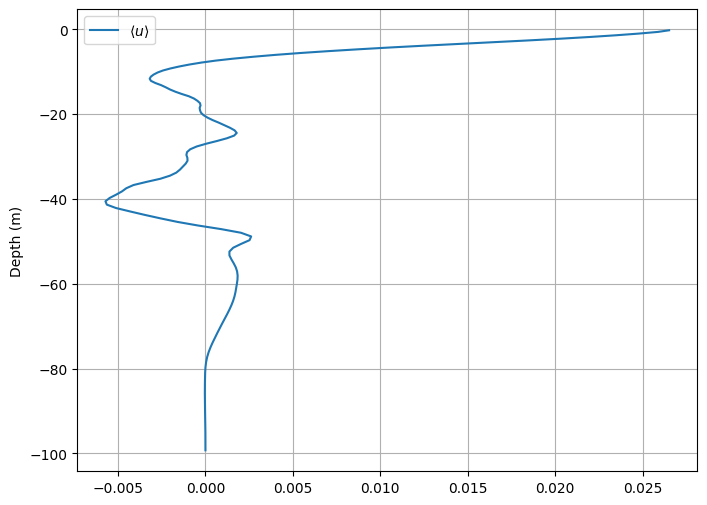

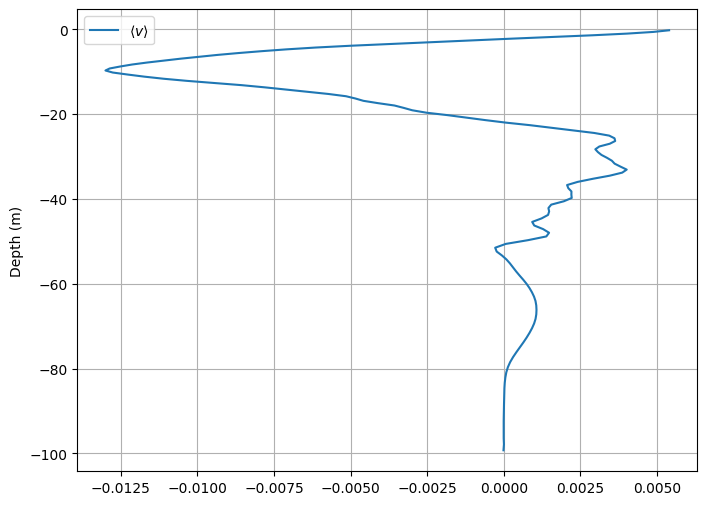

In [116]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

plt.figure(figsize=(8, 6))
plt.plot(ds_avg.u.isel(time=-1), ds_avg.zC, label="$\langle u \\rangle$")
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(ds_avg.v.isel(time=-1), ds_avg.zC, label="$\langle v \\rangle$")
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

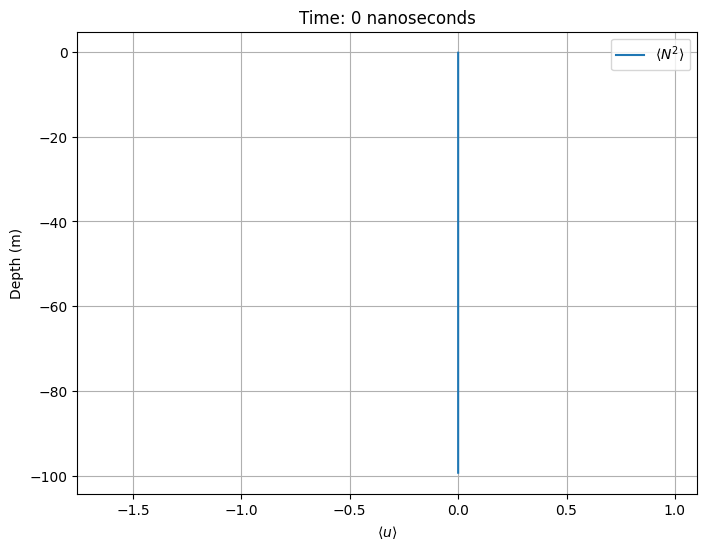

In [193]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the overall min and max of N2 for all time frames to set x-axis limits
u_min = ds_avg.u.min().values
u_max = ds_avg.u.max().values

# Define a function to update the plot for each frame
def update(frame):
    ax.cla()  # Clear the current axis
    ax.plot(ds_avg.u.isel(time=frame), ds_avg.zC, label="$\langle N^2 \\rangle$")
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('$\langle u \\rangle$')
    ax.legend()
    ax.grid()
    ax.set_title(f'Time: {ds_avg.time[frame].values}')
    ax.set_xlim(u_min, u_max)

# Create the animation object
ani = animation.FuncAnimation(fig, update, frames=len(ds_avg.time), repeat=False)

# Save the animation as a GIF
ani.save('u_evolution.gif', writer='pillow')

# JUNK

In [ ]:

print(ds['u'].sel(time="00:01:00")[0])

U_avg_final = U_avg.sel(time="00:01:00")[0]
# U_final_first_y = U_avg_final.isel(yC=0)

<xarray.DataArray 'N2' (time: 97, zF: 25, yC: 1, xC: 32)> Size: 621kB
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        ...,

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],

...

       [[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],



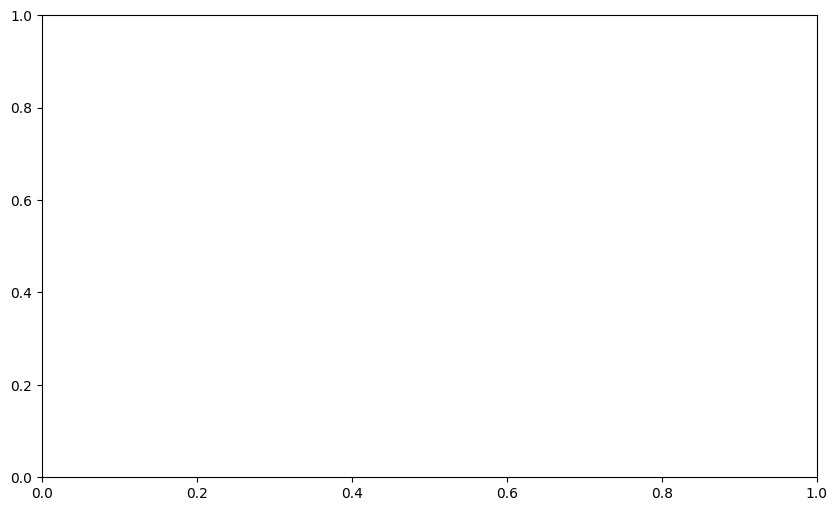

In [ ]:

print(ds['u'].sel(time="00:01:00")[0])

U_avg_final = U_avg.sel(time="00:01:00")[0]
# U_final_first_y = U_avg_final.isel(yC=0)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(U_avg_final.xF, U_avg_final.zC, label='<u>')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Path to your NetCDF file
nc_file = "../Log/buoyancy_and_wind.nc"
ds = xr.open_dataset(nc_file)
print(ds)

<xarray.Dataset> Size: 745kB
Dimensions:  (zC: 24, zF: 25, xC: 32, yF: 1, xF: 32, yC: 1, time: 121)
Coordinates:
  * zC       (zC) float64 192B -96.31 -89.14 -82.38 ... -5.506 -3.227 -1.058
  * zF       (zF) float64 200B -100.0 -92.62 -85.66 -79.09 ... -4.338 -2.116 0.0
  * xC       (xC) float64 256B 0.5 1.5 2.5 3.5 4.5 ... 27.5 28.5 29.5 30.5 31.5
  * yF       (yF) float64 8B 1.0
  * xF       (xF) float64 256B 0.0 1.0 2.0 3.0 4.0 ... 27.0 28.0 29.0 30.0 31.0
  * yC       (yC) float64 8B 1.0
  * time     (time) timedelta64[ns] 968B 00:00:00 00:30:00 ... 1 days 00:00:00
Data variables:
    u        (time, zC, yC, xF) float64 743kB ...
Attributes:
    interval:              900.0
    Oceananigans:          This file was generated using Oceananigans v0.91.4
    Julia:                 This file was generated using Julia Version 1.9.2\...
    output time interval:  Output was saved every 15 minutes.
    date:                  This file was generated on 2024-07-25T12:06:45.963.
    schedule:

In [5]:
print(ds['u'].sel(time="1days"))

<xarray.DataArray 'u' (zC: 24, yC: 1, xF: 32)> Size: 6kB
[768 values with dtype=float64]
Coordinates:
  * zC       (zC) float64 192B -96.31 -89.14 -82.38 ... -5.506 -3.227 -1.058
  * xF       (xF) float64 256B 0.0 1.0 2.0 3.0 4.0 ... 27.0 28.0 29.0 30.0 31.0
  * yC       (yC) float64 8B 1.0
    time     timedelta64[ns] 8B 1 days
Attributes:
    units:      m/s
    long_name:  Velocity in the x-direction


In [68]:
u = ds['u']

#get the data at the final time
u_final = u.sel(time="1days")
print(u_final)

u_final_first_y = u_final

print(u_final_first_y.isel(yC=0))

z_avg_u = u_final_first_y.mean(dim="xF")

<xarray.DataArray 'u' (zC: 24, yC: 1, xF: 32)> Size: 6kB
array([[[-4.46578164e-02, -4.43717863e-02, -4.41133615e-02,
         -4.38918881e-02, -4.37152664e-02, -4.35893800e-02,
         -4.35168975e-02, -4.34970070e-02, -4.35279108e-02,
         -4.36085710e-02, -4.37376945e-02, -4.39124119e-02,
         -4.41278673e-02, -4.43779752e-02, -4.46561383e-02,
         -4.49550944e-02, -4.52663650e-02, -4.55798586e-02,
         -4.58835201e-02, -4.61631565e-02, -4.64028790e-02,
         -4.65863661e-02, -4.66991803e-02, -4.67319766e-02,
         -4.66836384e-02, -4.65615763e-02, -4.63773201e-02,
         -4.61434808e-02, -4.58731902e-02, -4.55789656e-02,
         -4.52716760e-02, -4.49612660e-02]],

       [[-3.19197641e-02, -3.21480681e-02, -3.24054047e-02,
         -3.26803751e-02, -3.29608771e-02, -3.32332474e-02,
         -3.34840211e-02, -3.37034722e-02, -3.38855094e-02,
         -3.40247735e-02, -3.41153419e-02, -3.41523279e-02,
         -3.41338043e-02, -3.40617685e-02, -3.39418686e-0

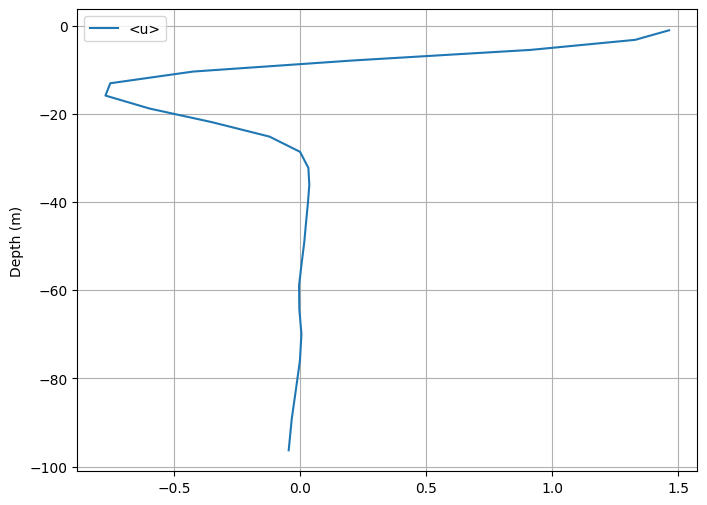

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(z_avg_u, z_avg_u.zC, label='<u>')
plt.ylabel('Depth (m)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Path to your NetCDF file
nc_file = "../buoyancy_and_wind.nc"
ds = xr.open_dataset(nc_file)

In [ ]:
print(ds)

In [ ]:
# Path to your NetCDF file
nc_file = "../Log/buoyancy_and_wind.nc"
ds = xr.open_dataset(nc_file)
print(ds)